In [1]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")

✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest


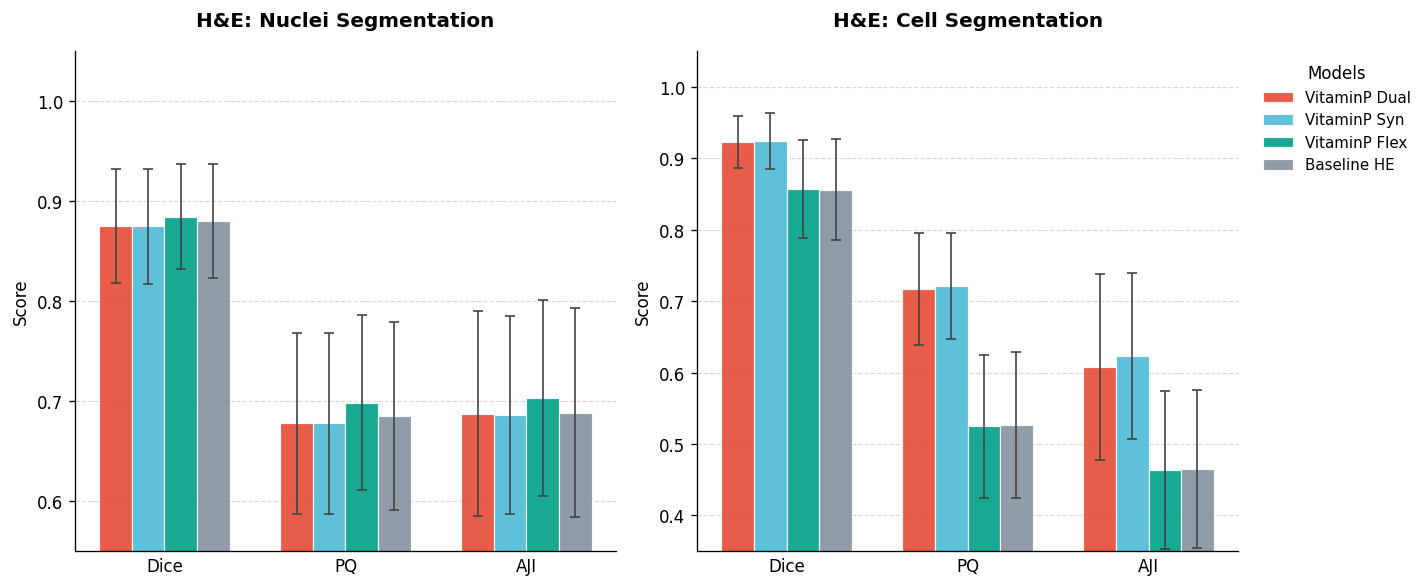

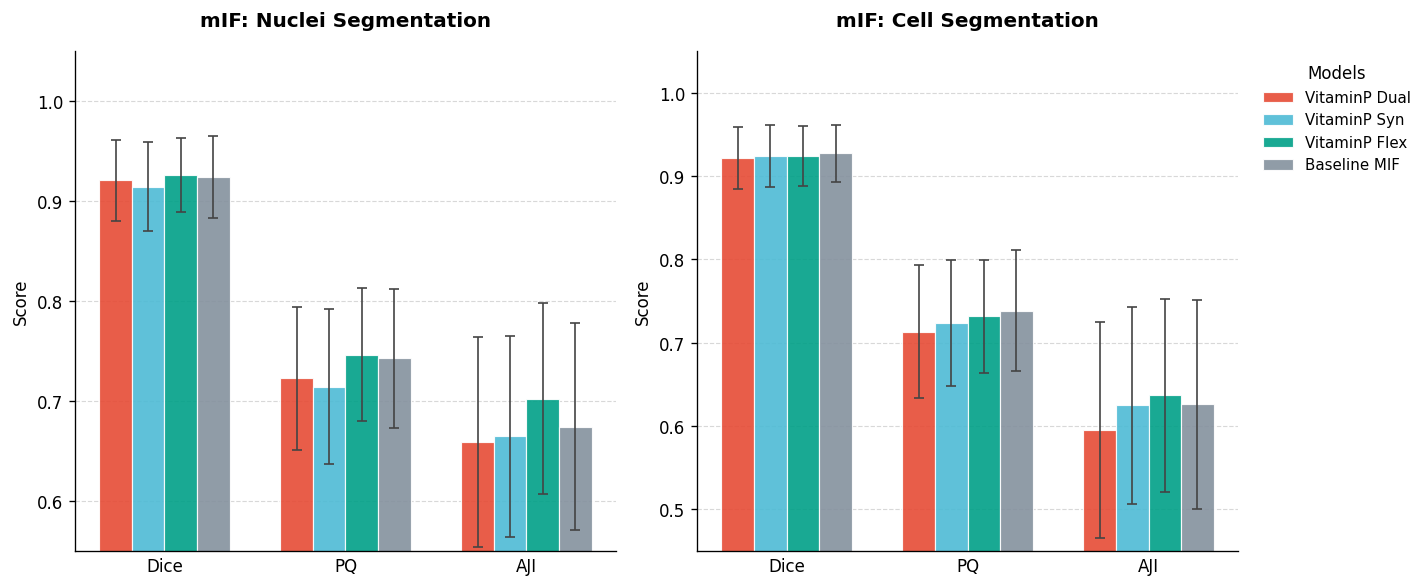

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 1. FIX FONT & STYLE for "Nature" Look
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
plt.rcParams['axes.linewidth'] = 0.8 # Thinner axes for cleaner look
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['ytick.major.width'] = 0.8
plt.rcParams['font.size'] = 10

# ---------------------------------------------------------
# 2. Data Definitions
# ---------------------------------------------------------

# H&E Data
he_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.8751, 'PQ': 0.6777, 'AJI': 0.6874, 'Dice_std': 0.0571, 'PQ_std': 0.0907, 'AJI_std': 0.1027},
        'VitaminP Syn':  {'Dice': 0.8747, 'PQ': 0.6777, 'AJI': 0.6862, 'Dice_std': 0.0574, 'PQ_std': 0.0901, 'AJI_std': 0.0989},
        'VitaminP Flex': {'Dice': 0.8845, 'PQ': 0.6984, 'AJI': 0.7033, 'Dice_std': 0.0523, 'PQ_std': 0.0873, 'AJI_std': 0.0978},
        'Baseline HE':   {'Dice': 0.8801, 'PQ': 0.6852, 'AJI': 0.6885, 'Dice_std': 0.0571, 'PQ_std': 0.0937, 'AJI_std': 0.1045},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9226, 'PQ': 0.7164, 'AJI': 0.6078, 'Dice_std': 0.0358, 'PQ_std': 0.0784, 'AJI_std': 0.1303},
        'VitaminP Syn':  {'Dice': 0.9242, 'PQ': 0.7211, 'AJI': 0.6236, 'Dice_std': 0.0388, 'PQ_std': 0.0747, 'AJI_std': 0.1162},
        'VitaminP Flex': {'Dice': 0.8568, 'PQ': 0.5249, 'AJI': 0.4639, 'Dice_std': 0.0684, 'PQ_std': 0.0999, 'AJI_std': 0.1105},
        'Baseline HE':   {'Dice': 0.8561, 'PQ': 0.5262, 'AJI': 0.4652, 'Dice_std': 0.0712, 'PQ_std': 0.1019, 'AJI_std': 0.1102},
    }
}

# mIF Data
mif_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.9206, 'PQ': 0.7229, 'AJI': 0.6589, 'Dice_std': 0.0405, 'PQ_std': 0.0713, 'AJI_std': 0.1049},
        'VitaminP Syn':  {'Dice': 0.9145, 'PQ': 0.7146, 'AJI': 0.6647, 'Dice_std': 0.0448, 'PQ_std': 0.0779, 'AJI_std': 0.1004},
        'VitaminP Flex': {'Dice': 0.9259, 'PQ': 0.7465, 'AJI': 0.7022, 'Dice_std': 0.0367, 'PQ_std': 0.0661, 'AJI_std': 0.0955},
        'Baseline MIF':  {'Dice': 0.9243, 'PQ': 0.7428, 'AJI': 0.6745, 'Dice_std': 0.0409, 'PQ_std': 0.0693, 'AJI_std': 0.1037},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9220, 'PQ': 0.7135, 'AJI': 0.5951, 'Dice_std': 0.0370, 'PQ_std': 0.0795, 'AJI_std': 0.1297},
        'VitaminP Syn':  {'Dice': 0.9244, 'PQ': 0.7235, 'AJI': 0.6249, 'Dice_std': 0.0374, 'PQ_std': 0.0759, 'AJI_std': 0.1184},
        'VitaminP Flex': {'Dice': 0.9243, 'PQ': 0.7320, 'AJI': 0.6369, 'Dice_std': 0.0361, 'PQ_std': 0.0678, 'AJI_std': 0.1158},
        'Baseline MIF':  {'Dice': 0.9273, 'PQ': 0.7387, 'AJI': 0.6260, 'Dice_std': 0.0339, 'PQ_std': 0.0728, 'AJI_std': 0.1250},
    }
}

metrics = ['Dice', 'PQ', 'AJI']

# Nature-style colors (NPG inspired: Red, Blue, Green, Grey)
colors = ['#E64B35', '#4DBBD5', '#00A087', '#84919E'] 

# ---------------------------------------------------------
# 3. Plotting Function
# ---------------------------------------------------------
def create_chart_nature(data_dict, title_prefix, filename_png=None):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=120) 
    
    tasks = ['Nuclei', 'Cell']
    
    for idx, task in enumerate(tasks):
        ax = axes[idx]
        task_data = data_dict[task]
        
        models = list(task_data.keys())
        x = np.arange(len(metrics))
        width = 0.18 # Slightly thinner bars for elegance
        
        # --- DYNAMIC Y-LIMIT CALCULATION ---
        # Gather all mean values in this chart to find the min
        all_means = []
        for model in models:
            all_means.extend([task_data[model][m] for m in metrics])
        
        min_val = min(all_means)
        # Set bottom limit to just below the minimum value (e.g., if min is 0.46, bottom is 0.40)
        # This zooms in on the "top parts"
        y_bottom = max(0, np.floor(min_val * 10) / 10 - 0.05)
        
        # Plot bars
        for i, model in enumerate(models):
            means = [task_data[model][m] for m in metrics]
            stds = [task_data[model][f'{m}_std'] for m in metrics]
            
            ax.bar(x + i*width, means, width, label=model, 
                   yerr=stds, capsize=3, 
                   color=colors[i], alpha=0.9, 
                   edgecolor='white', linewidth=0.7, # Clean white edges
                   error_kw={'elinewidth': 1, 'markeredgewidth': 1, 'ecolor': '#444444'}) # Thinner error bars

        # Formatting
        ax.set_title(f'{title_prefix}: {task} Segmentation', fontsize=12, weight='bold', pad=15)
        
        # X-axis
        ax.set_xticks(x + width * (len(models) - 1) / 2)
        ax.set_xticklabels(metrics, fontsize=10)
        ax.tick_params(axis='x', length=0) # Hide x ticks for cleaner look
        
        # Y-axis
        ax.set_ylim(y_bottom, 1.05) # Zoomed range
        ax.set_ylabel('Score', fontsize=10)
        
        # Grid behind bars
        ax.grid(axis='y', linestyle='--', alpha=0.3, linewidth=0.7, color='gray')
        ax.set_axisbelow(True) 
        
        # Clean Spines (Nature style often removes top/right box)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.8)
        ax.spines['bottom'].set_linewidth(0.8)

        # Legend: Place outside or in a clean spot
        if idx == 1:
            # bbox_to_anchor moves it slightly outside to the right
            ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), 
                      fontsize=9, frameon=False, title="Models")

    plt.tight_layout()
    
    # Uncomment these lines later to save
    # if filename_png:
    #     plt.savefig(filename_png, dpi=300, bbox_inches='tight')
    #     plt.savefig(filename_png.replace('.png', '.pdf'), format='pdf', bbox_inches='tight')
    
    plt.show()

# ---------------------------------------------------------
# 4. Generate Charts
# ---------------------------------------------------------

create_chart_nature(he_data, 'H&E', 'HE_Chart.png')
create_chart_nature(mif_data, 'mIF', 'mIF_Chart.png')

✓ Success! VitaminP_Manuscript_Figure.pdf generated with all elements included.
  - All 4 subplots (H&E and mIF for Nuclei and Cell)
  - Complete legend with all 6 models
  - Error bars and data points
  - Panel labels (a, b)


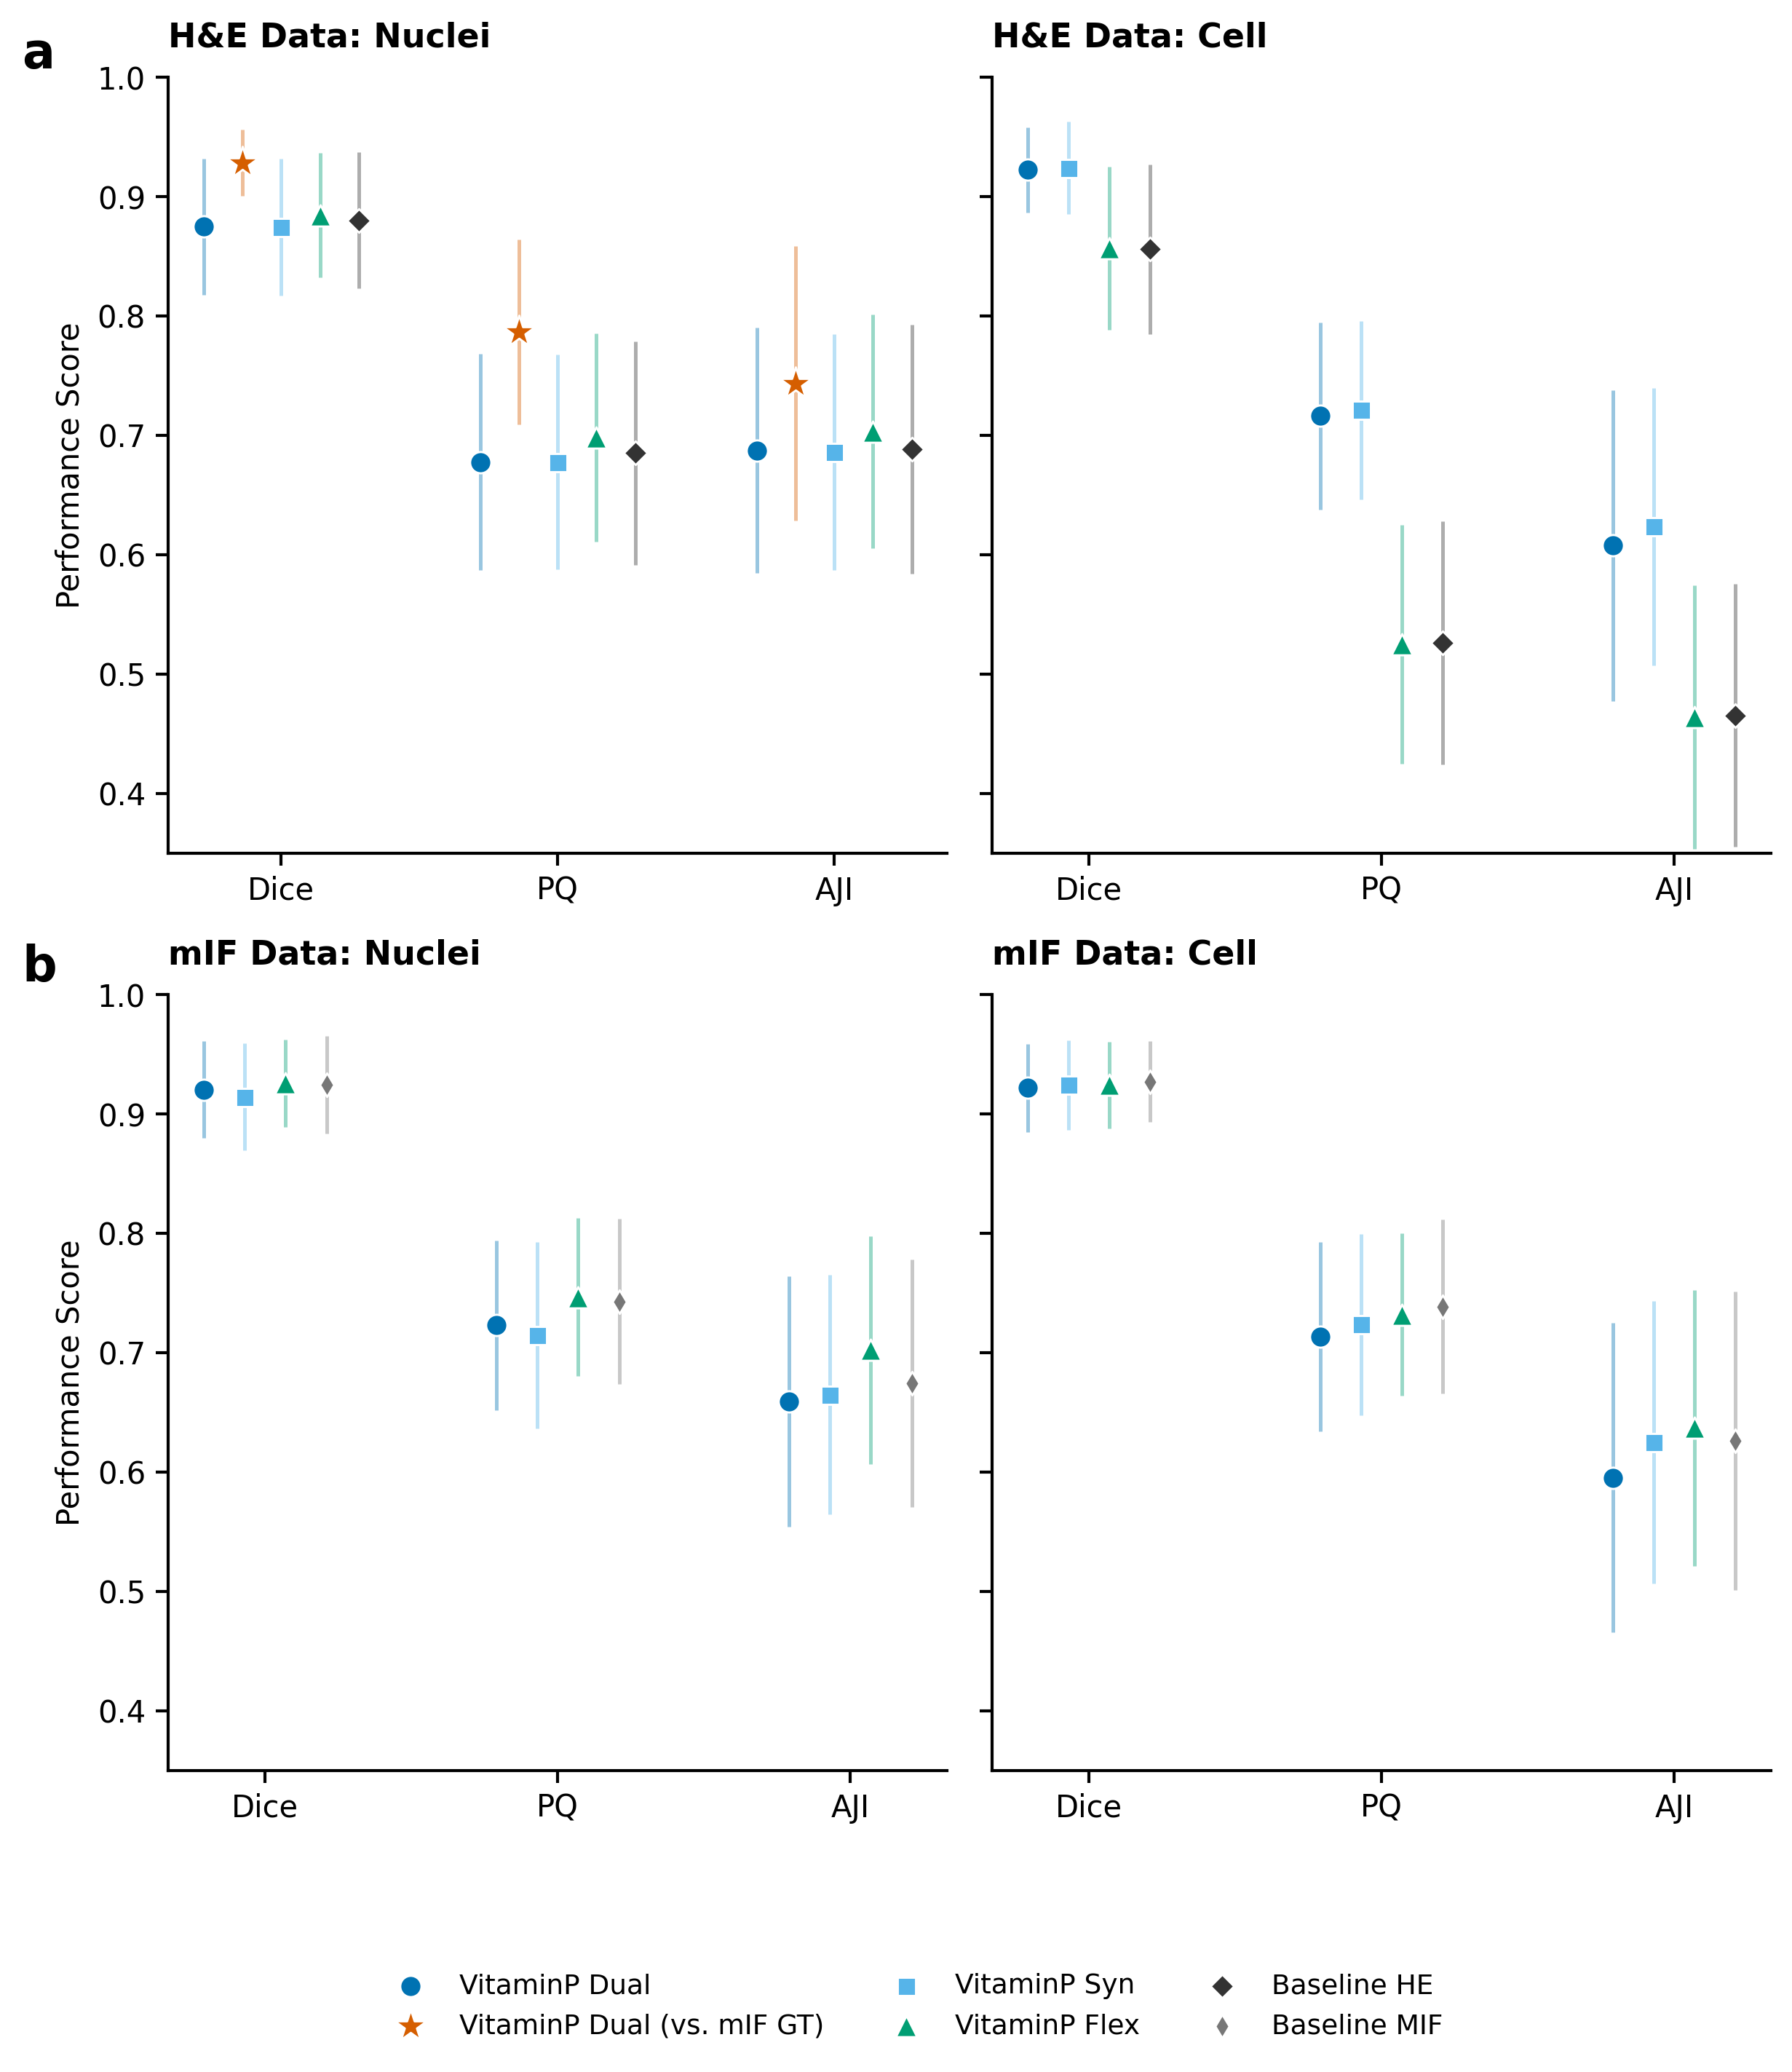

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. SETUP STYLING (Nature-Style & Illustrator Compatible)
# ---------------------------------------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'pdf.fonttype': 42,  # Keeps text editable in Illustrator
    'ps.fonttype': 42,
    'axes.linewidth': 1.0,
    'font.size': 10,
    'axes.grid': False,  # No unnecessary horizontal lines
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.direction': 'out',
    'ytick.direction': 'out'
})

# ---------------------------------------------------------
# 2. DATA
# ---------------------------------------------------------
he_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.8751, 'PQ': 0.6777, 'AJI': 0.6874, 'Dice_std': 0.0571, 'PQ_std': 0.0907, 'AJI_std': 0.1027},
        'VitaminP Dual (vs. mIF GT)': {'Dice': 0.9285, 'PQ': 0.7866, 'AJI': 0.7434, 'Dice_std': 0.0277, 'PQ_std': 0.0777, 'AJI_std': 0.1151},
        'VitaminP Syn':  {'Dice': 0.8747, 'PQ': 0.6777, 'AJI': 0.6862, 'Dice_std': 0.0574, 'PQ_std': 0.0901, 'AJI_std': 0.0989},
        'VitaminP Flex': {'Dice': 0.8845, 'PQ': 0.6984, 'AJI': 0.7033, 'Dice_std': 0.0523, 'PQ_std': 0.0873, 'AJI_std': 0.0978},
        'Baseline HE':   {'Dice': 0.8801, 'PQ': 0.6852, 'AJI': 0.6885, 'Dice_std': 0.0571, 'PQ_std': 0.0937, 'AJI_std': 0.1045},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9226, 'PQ': 0.7164, 'AJI': 0.6078, 'Dice_std': 0.0358, 'PQ_std': 0.0784, 'AJI_std': 0.1303},
        'VitaminP Syn':  {'Dice': 0.9242, 'PQ': 0.7211, 'AJI': 0.6236, 'Dice_std': 0.0388, 'PQ_std': 0.0747, 'AJI_std': 0.1162},
        'VitaminP Flex': {'Dice': 0.8568, 'PQ': 0.5249, 'AJI': 0.4639, 'Dice_std': 0.0684, 'PQ_std': 0.0999, 'AJI_std': 0.1105},
        'Baseline HE':   {'Dice': 0.8561, 'PQ': 0.5262, 'AJI': 0.4652, 'Dice_std': 0.0712, 'PQ_std': 0.1019, 'AJI_std': 0.1102},
    }
}

mif_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.9206, 'PQ': 0.7229, 'AJI': 0.6589, 'Dice_std': 0.0405, 'PQ_std': 0.0713, 'AJI_std': 0.1049},
        'VitaminP Syn':  {'Dice': 0.9145, 'PQ': 0.7146, 'AJI': 0.6647, 'Dice_std': 0.0448, 'PQ_std': 0.0779, 'AJI_std': 0.1004},
        'VitaminP Flex': {'Dice': 0.9259, 'PQ': 0.7465, 'AJI': 0.7022, 'Dice_std': 0.0367, 'PQ_std': 0.0661, 'AJI_std': 0.0955},
        'Baseline MIF':  {'Dice': 0.9243, 'PQ': 0.7428, 'AJI': 0.6745, 'Dice_std': 0.0409, 'PQ_std': 0.0693, 'AJI_std': 0.1037},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9220, 'PQ': 0.7135, 'AJI': 0.5951, 'Dice_std': 0.0370, 'PQ_std': 0.0795, 'AJI_std': 0.1297},
        'VitaminP Syn':  {'Dice': 0.9244, 'PQ': 0.7235, 'AJI': 0.6249, 'Dice_std': 0.0374, 'PQ_std': 0.0759, 'AJI_std': 0.1184},
        'VitaminP Flex': {'Dice': 0.9243, 'PQ': 0.7320, 'AJI': 0.6369, 'Dice_std': 0.0361, 'PQ_std': 0.0678, 'AJI_std': 0.1158},
        'Baseline MIF':  {'Dice': 0.9273, 'PQ': 0.7387, 'AJI': 0.6260, 'Dice_std': 0.0339, 'PQ_std': 0.0728, 'AJI_std': 0.1250},
    }
}

# ---------------------------------------------------------
# 3. UPDATED COLOR & MARKER CONFIG
# ---------------------------------------------------------
STYLE_CONFIG = {
    'VitaminP Dual':              {'color': '#0072B2', 'marker': 'o', 'ms': 7},
    'VitaminP Dual (vs. mIF GT)': {'color': '#D55E00', 'marker': '*', 'ms': 11},
    'VitaminP Syn':               {'color': '#56B4E9', 'marker': 's', 'ms': 6},
    'VitaminP Flex':              {'color': '#009E73', 'marker': '^', 'ms': 7},
    'Baseline HE':                {'color': '#333333', 'marker': 'D', 'ms': 5.5}, # Dark Charcoal
    'Baseline MIF':               {'color': '#777777', 'marker': 'd', 'ms': 5.5}, # Medium Gray/Slate
}

# ---------------------------------------------------------
# 4. PLOTTING FUNCTION
# ---------------------------------------------------------
def create_publication_figure(filename="VitaminP_Manuscript_Figure.pdf"):
    # Increased figure height to accommodate legend at bottom
    fig, axes = plt.subplots(2, 2, figsize=(8.5, 9.5), dpi=300, sharey=True)
    
    datasets = [('H&E Data', he_data, 'a'), ('mIF Data', mif_data, 'b')]
    metrics = ['Dice', 'PQ', 'AJI']
    width_jitter = 0.14

    # Keep track of all legend handles for the unified legend
    all_handles = {}

    for row_idx, (title, data_dict, label) in enumerate(datasets):
        fig.text(0.02, 0.96 - (row_idx * 0.44), label, fontsize=16, fontweight='bold', va='top')
        
        tasks = ['Nuclei', 'Cell']
        for col_idx, task in enumerate(tasks):
            ax = axes[row_idx, col_idx]
            task_data = data_dict[task]
            models = list(task_data.keys())
            x_base = np.arange(len(metrics))
            
            for i, model in enumerate(models):
                m_data = task_data[model]
                means = [m_data[m] for m in metrics]
                stds = [m_data[f'{m}_std'] for m in metrics]
                
                x_pos = x_base + (i - (len(models)-1)/2) * width_jitter
                cfg = STYLE_CONFIG.get(model, {'color': '#999999', 'marker': 'o', 'ms': 6})
                
                # Plot Error Bars
                ax.errorbar(x_pos, means, yerr=stds, fmt='none', 
                            ecolor=cfg['color'], elinewidth=1.2, capsize=0, alpha=0.4)
                
                # Plot Points
                scatter = ax.scatter(x_pos, means, label=model, 
                                   color=cfg['color'], marker=cfg['marker'], s=cfg['ms']**2, 
                                   zorder=3, edgecolors='white', linewidths=0.7)
                
                # Store handle if not already added
                if model not in all_handles:
                    all_handles[model] = scatter

            # Subplot Aesthetics
            ax.set_title(f'{title}: {task}', loc='left', fontweight='bold', pad=10)
            ax.set_xticks(x_base)
            ax.set_xticklabels(metrics)
            ax.set_ylim(0.35, 1.0)  # Adjusted to 0.35 to show all data points including lower AJI values
            
            if col_idx == 0:
                ax.set_ylabel('Performance Score')
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

    # 5. UNIFIED LEGEND (Ensures all baselines and variants are included)
    # Sort handles to maintain a logical order
    model_order = [
        'VitaminP Dual', 'VitaminP Dual (vs. mIF GT)', 'VitaminP Syn', 
        'VitaminP Flex', 'Baseline HE', 'Baseline MIF'
    ]
    sorted_handles = [all_handles[m] for m in model_order if m in all_handles]
    sorted_labels = [m for m in model_order if m in all_handles]

    # Adjusted legend positioning with more space at bottom
    fig.legend(sorted_handles, sorted_labels, loc='lower center', 
               bbox_to_anchor=(0.5, -0.02), ncol=3, frameon=False, fontsize=9)

    # Adjusted tight_layout to leave more room for legend
    plt.tight_layout(rect=[0.02, 0.08, 0.98, 0.98])
    
    # Save command with explicit bbox_inches='tight' to ensure everything is captured
    plt.savefig(filename, format='pdf', bbox_inches='tight', transparent=False, dpi=300)
    print(f"✓ Success! {filename} generated with all elements included.")
    print(f"  - All 4 subplots (H&E and mIF for Nuclei and Cell)")
    print(f"  - Complete legend with all 6 models")
    print(f"  - Error bars and data points")
    print(f"  - Panel labels (a, b)")
    
    plt.show()

# Run the generation
if __name__ == "__main__":
    create_publication_figure()